In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv('data/weight.csv',header=0)
df.rename(columns={"Weight (kg)": "weight", "Height (cm)": "height"}, inplace=True)
df

,weight,height
0,74.97,173.24
1,68.62,166.15
2,76.48,163.23
3,85.23,176.12
4,67.66,180.31
5,67.66,179.31
6,85.79,161.61
7,77.67,166.91
8,65.31,173.31
9,75.43,179.76


<Axes: xlabel='weight', ylabel='height'>

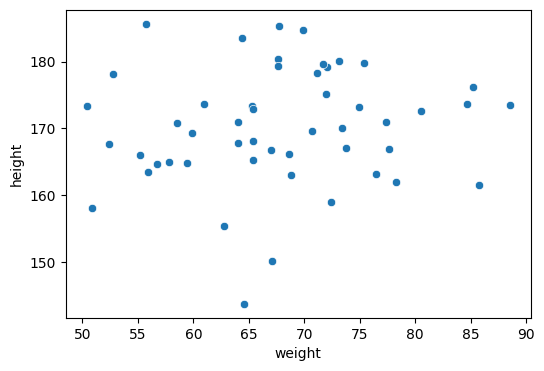

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(df,x='weight',y='height')

In [17]:
df.corr()

,weight,height
weight,1.000000,0.110062
height,0.110062,1.000000


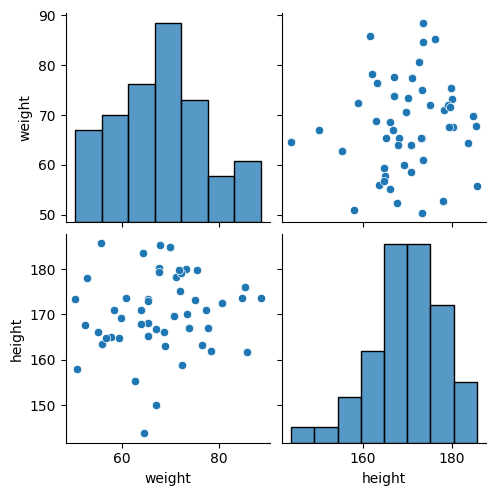

In [18]:
sns.pairplot(df)

#### Independent variable should always be a 2D array

In [24]:
X=df[['weight']]
y=df['height']

#### Test Train Split

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Standard Scaler - Z-score is used

In [26]:
# Apply Standardisation - using Z-score;
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()

##### Fit transform used for Train data

In [28]:
X_train=scaler.fit_transform(X_train)

##### Transform used for test data - If fit transform is used for test data, then data leakage will happen

In [29]:
X_test=scaler.transform(X_test)

#### Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression(n_jobs=-1)

In [32]:
model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

#### Coefficient and Intercept of Slope

In [48]:
print(f"Intercept:",model.intercept_)
print(f"Coefficient or Slope:",model.coef_)

Intercept: 169.7509090909091
Coefficient or Slope: [0.26440484]


Coefficient or Slope: [0.26440484]


In [44]:
y_pred=model.predict(X_train)

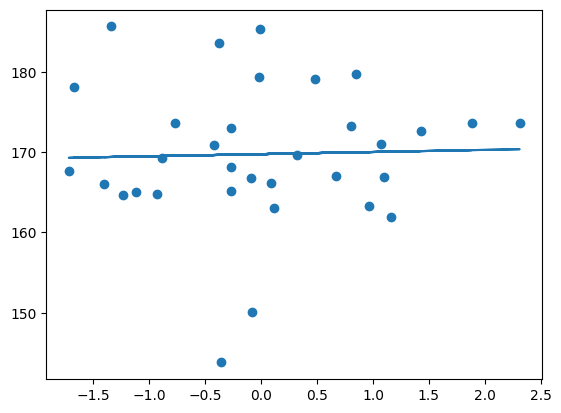

In [45]:
plt.scatter(x=X_train,y=y_train)
plt.plot(X_train,y_pred)

In [46]:
y_pred=model.predict(X_test)

#### Metrics